In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

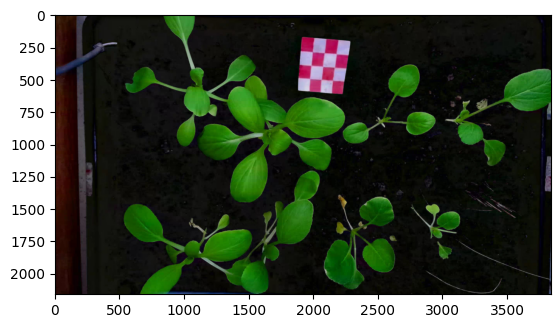

In [26]:
img_path = r"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_topview_smartfarm\picture_topview_23092025_142837.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

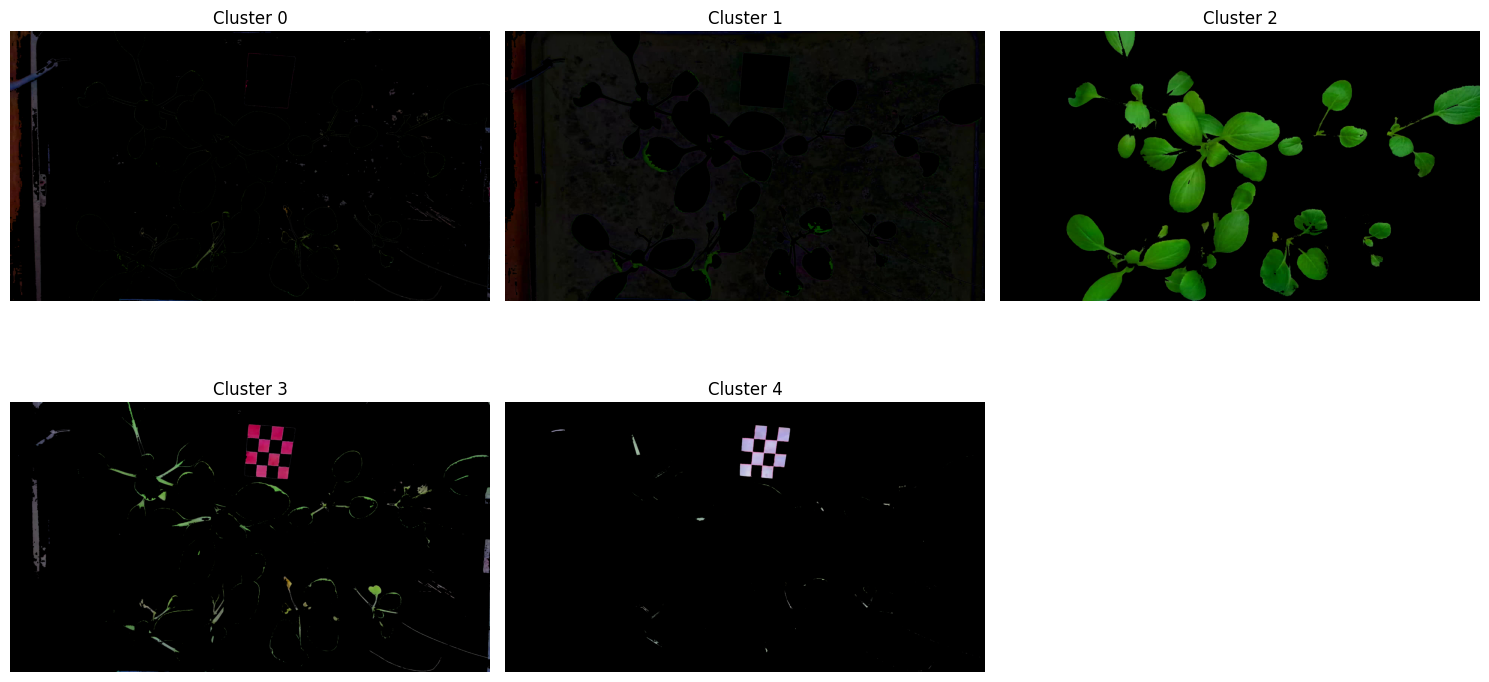

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- 1) เตรียมข้อมูล ---
H, W = img_rgb.shape[:2]
pixels = img_rgb.reshape(-1, 3).astype(np.float64)

# --- 2) ทำ KMeans ---
k = 5
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(pixels)
labels = kmeans.labels_.reshape(H, W)

# --- 3) แสดงผลทุกคลัสเตอร์ ---
plt.figure(figsize=(15, 8))

for i in range(k):
    # หน้ากากของคลัสเตอร์ i
    mask = (labels == i).astype(np.uint8) * 255
    # เก็บเฉพาะพิกเซลในคลัสเตอร์นั้น
    seg = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    
    # พล็อต
    plt.subplot(2, (k+1)//2, i+1)
    plt.imshow(seg)
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()
